<a href="https://colab.research.google.com/github/olgOk/Tennis-Ace/blob/master/TennisAce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tennis Ace Regression Model

## Project Goals

We will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, we will determine what it takes to be one of the best tennis players in the world.

First, import libraries/frameworks

In [10]:
#@title
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd drive

/content/drive


In [18]:
cd  My\ Drive

/content/drive/My Drive


In [19]:
cd tennis_ace_starting/

/content/drive/My Drive/tennis_ace_starting


We will load csv file and make a DataFrame out of it. The first step is to investigate and analyze parameters given. For this purpose, use ```DataFrame()``` method from Pandas framework.

As we can see, the following parameters are given:


1.   Identifying Data


*   Player: name of the tennis player
*   Year: year data was recorded


2.   Service Game Columns (Offensive)

*   Aces: number of serves by the player where the receiver does not touch the ball
*   DoubleFaults: number of times player missed both first and second serve attempts

*   FirstServe: % of first-serve attempts made
*   FirstServePointsWon: % of first-serve attempt points won by the player
*   SecondServePointsWon: % of second-serve attempt points won by the player
*   BreakPointsFaced: number of times where the receiver could have won service game of the player
*   BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
*   ServiceGamesPlayed: total number of games where the player served
*   ServiceGamesWon: total number of games where the player served and won
*   TotalServicePointsWon: % of points in games where the player served that they won

3. Return Game Columns (Defensive)
*   FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
*   SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
*   BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
*   BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
*   ReturnGamesPlayed: total number of games where the player’s opponent served
*   ReturnGamesWon: total number of games where the player’s opponent served and the player won
*   ReturnPointsWon: total number of points where the player’s opponent served and the player won
*   TotalPointsWon: % of points won by the player
4. Outcomes
*   Wins: number of matches won in a year
*   Losses: number of matches lost in a year
*   Winnings: total winnings in USD($) in a year
*   Ranking: ranking at the end of year



In [0]:
# load and investigate the data:
data = pd.read_csv("tennis_stats.csv")

In [25]:
# perform exploratory analysis:

df = pd.DataFrame(data=data)
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


Let's perform exploratory analysis on the data by plotting different features against the different outcomes. We will utilize matplotlib’s `.scatter()` method to plot different features against different outcomes. As you can see, there is a strong relationship between the *BreakPointsOpportunities* feature and the *Winnings* outcome.

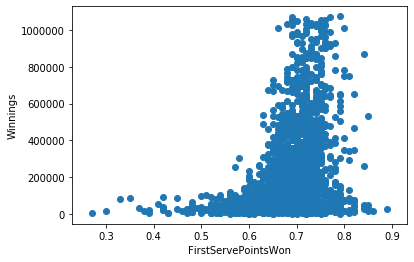

In [29]:
plt.scatter(df[['FirstServePointsWon']], df[["Winnings"]])
plt.xlabel(xlabel='FirstServePointsWon')
plt.ylabel(ylabel='Winnings')
plt.show()

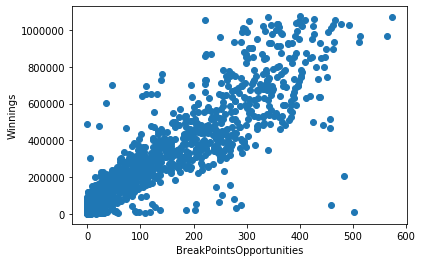

In [30]:
plt.scatter(df[['BreakPointsOpportunities']], df[["Winnings"]])
plt.xlabel(xlabel='BreakPointsOpportunities')
plt.ylabel(ylabel='Winnings')
plt.show()

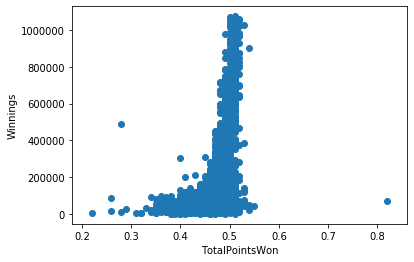

In [31]:
plt.scatter(df[['TotalPointsWon']], df[["Winnings"]])
plt.xlabel(xlabel='TotalPointsWon')
plt.ylabel(ylabel='Winnings')
plt.show()

Before we start to train the model and making predictions out of it, let's split the data set into training and evaluating sets using ``` train_test_split() ``` method. 80% of the data will serve as a training set, and 20% of the data will be testing set.



In [0]:
# define x axis							
x = df[['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon',
        'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces',
        'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities',
        'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
        'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon',
        'TotalServicePointsWon', 'Wins', 'Losses', 'Ranking']]
# define y axis
y = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2) 

We will create a multiple linear regression model using `sklear.LinearRegression`. We fit the training set to the model and then make a prediction.

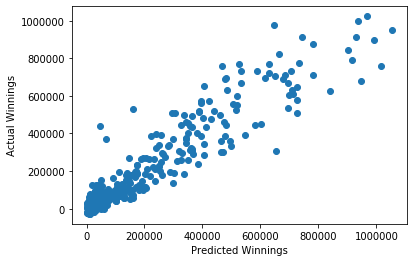

In [39]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)
plt.scatter(y_test,y_predict)
plt.xlabel("Predicted Winnings")
plt.ylabel("Actual Winnings")
plt.show()

After performing multiple linear regression, we can print the coefficients using `.coef_`.

Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively. 

After analyzing the values of the coefficients, I will remove less impuctfull from the training and testing sets:


*   Aces
*   BreakPointsFaced
*   BreakPointsOpportunities
*   DoubleFaults
*   ReturnGamesPlayed
*   Ranking

Additionaly, we will print out the accuracy of the model before and after the feature cleaning. As you can see, after removing some features model learns the coefficients more correctly.



In [44]:
print("Accuracy on training set = ", mlr.score(x_train, y_train))
print("Accuracy on testing set = ", mlr.score(x_test, y_test))
print("model coff =", mlr.coef_)

Accuracy on training set =  0.8758500055118217
Accuracy on testing set =  0.8602465738792887
model coff = [[-2.72730068e+04 -1.10079504e+04  4.97111863e+03  6.31413349e+03
   5.64523452e+04 -8.84520377e+01  1.61817573e+04 -6.32252298e+02
   4.37896598e+02  3.38019607e+04  4.81388174e+02 -7.52965106e+02
   1.93648216e+04 -1.34686571e+05  1.21264529e+03 -3.58338586e+03
  -9.02331706e+04  7.10878379e+04  1.06607284e+04  3.77379326e+03
  -7.24342671e+01]]


In [46]:
# redefiny x axises
x = df[['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon',
        'SecondServePointsWon', 'SecondServeReturnPointsWon', 'BreakPointsConverted',
        'BreakPointsSaved', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed',
        'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses']]

y = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)
print("Accuracy on training set = ", mlr.score(x_train, y_train))
print("Accuracy on testing set = ", mlr.score(x_test, y_test))

Accuracy on training set =  0.8651811819468667
Accuracy on testing set =  0.868794980398225
